# Capstone Project - The Battle of the Neighborhoods

## WEEK 1: 

For this week, you will required to submit the following:

    -A description of the problem and a discussion of the background. (15 marks)
answer:  [Introduction: Business Problem](#introduction)

    -A description of the data and how it will be used to solve the problem. (15 marks)
answer: [Data](#data) , [Methodology](#methodology)

## WEEK 2: Final Project and Report
click Table of contents superlink to quickly locate to each part

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion and Report Link](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

__Background:__

Beringer Vineyards Inc. is one of the top wine companies in the U.S. The stakeholders are planning to open a flagship store in Europe for branding and market shares expansion. Paris is famous for its cuisine and wine industry in the world. The stakeholders chose Paris as the city of the flagships store. The competition is aggressive and we need an objective reasoning while choosing the locations, therefore, data science is adopted to help with the decision making.

This project aims to find optimal neighborhoods for **a fine wine flagship store in Paris, France**. The result of this project is to find a couple of options, rather than a specific store, because this project will be followed by an on-site narrow-down research and finally help with stakeholders' decision-making.

__Criteria:__

The idea locations should meet these requirements:
* __To attract potential clients and for the best brand advertisement practice, locations should be close to restaurants and bars to guarantee heavy people traffic.__
* __We want to avoid the most expensive neighborhoods like Ave Champs-Elysees because previous market research found the operation costs in these expensive neighborhoods won't cut the books even. Medium high-end areas would be ideal.__
* __Locations are as close to city center as possible, while meeting the other two criteria.__ 

We will use our data science powers to generate a few most promising neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final neighborhood can be chosen by stakeholders.

## Data <a name="data"></a>

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Following data sources will be needed to extract/generate the required information:

Arrondissements Municipaux for Paris CSV (administrative districts)

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

## Methodology <a name="methodology"></a>

The methodology and work flow includes the following:

* Outline the initial data that is required:
        District data for Paris including names, location data if available, and any other details required.


* Obtain the Data:
        Research and find suitable sources for the district data for Paris.
        Access and explore the data to determine if it can be manipulated for our purposes.


* Data Cleaning:
        Clean the data, drop redundant columns; extract and convert the useful ones to pandas dataframe.


* Data Analysis and Location Data:
        Foursquare location data will be leveraged to explore districts in Paris.
        Data manipulation and analysis to derive subsets of the initial data.
        Identify high traffic areas.


* Visualization:
        Analysis and plotting the maps to demonstrate the analysis result.


* Conclusions:
        Summary the findings of the project.
        Recommendation making.
        Final report to present to the stakeholders.

## Analysis <a name="analysis"></a>

In [2]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 112kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 6.7MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.8           |   py36h45558ae_2         628 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jinja2-2.11.2       




__Step 1: Obtain Data__

In [36]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


__Step 2: Data Cleaning__

In [5]:
paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [6]:
paris.shape

(20, 5)

__Step 3: Adding geograhical data to the dataframe__

In [7]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

__The map above shows all the neighborhoods in Paris.__

In [9]:
# my credential will be wiped out here after the results generated

CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [11]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


In [14]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9761809fcb92001ebb7a1b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

In [15]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
5,Square du Temple,Park,48.864475,2.360816
6,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,Les Enfants Rouges,Wine Bar,48.863013,2.361260
9,Chez Taeko,Japanese Restaurant,48.862734,2.362136


In [17]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

84 venues were returned by Foursquare.


In [18]:
# Create a nearby venues function for all the neighborhoods in Paris

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [19]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [20]:
print(paris_venues.shape)
paris_venues.head(20)

(1252, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
5,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
6,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
7,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
8,3eme Ardt,48.862872,2.360001,Les Enfants Rouges,48.863013,2.361260,Wine Bar
9,3eme Ardt,48.862872,2.360001,Chez Taeko,48.862734,2.362136,Japanese Restaurant


In [21]:
# Check how many venues were returned for each neighborhood

paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,69,69,69,69,69,69
12eme Ardt,5,5,5,5,5,5
13eme Ardt,59,59,59,59,59,59
14eme Ardt,28,28,28,28,28,28
15eme Ardt,60,60,60,60,60,60
16eme Ardt,12,12,12,12,12,12
17eme Ardt,53,53,53,53,53,53
18eme Ardt,40,40,40,40,40,40


In [22]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 199 unique venue categories.


In [23]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1250,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014493,0.00000,0.00000,0.00,0.000000,0.000000,0.014493,0.000000,0.014493,...,0.000000,0.014493,0.00,0.014493,0.014493,0.043478,0.000000,0.014493,0.0,0.0
2,12eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.203390,...,0.000000,0.000000,0.00,0.000000,0.220339,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.016667,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.016667,0.016667,0.0,0.0
6,16eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.018868,0.000000,0.018868,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.025000,0.025000,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.02439,0.02439,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.024390,0.000000,0.000000,0.000000,0.0,0.0


In [25]:
# print each neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                      venue  freq
0         French Restaurant  0.13
1               Coffee Shop  0.05
2                     Hotel  0.05
3                      Café  0.04
4         Indian Restaurant  0.04
5                    Bistro  0.04
6                       Bar  0.03
7       Japanese Restaurant  0.03
8               Pizza Place  0.03
9  Mediterranean Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1           Restaurant  0.06
2          Supermarket  0.06
3          Pastry Shop  0.04
4             Wine Bar  0.04
5                  Bar  0.04
6         Cocktail Bar  0.03
7   Italian Restaurant  0.03
8  Japanese Restaurant  0.03
9              Theater  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit   0.2
1              Supermarket   0.2
2                     Park   0.2
3      Monument / Landmark   0.2
4                      Zoo   0.2
5        Jewish Restaurant   0.0
6              

In [26]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Indian Restaurant,Bistro,Café,Pizza Place,Bar,Japanese Restaurant,Bakery
1,11eme Ardt,French Restaurant,Restaurant,Supermarket,Wine Bar,Bar,Pastry Shop,Bakery,Cocktail Bar,Italian Restaurant,Japanese Restaurant
2,12eme Ardt,Zoo Exhibit,Zoo,Supermarket,Park,Monument / Landmark,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Plaza,Sandwich Place,Bus Stop,Cambodian Restaurant
4,14eme Ardt,French Restaurant,Hotel,Pizza Place,Bakery,Food & Drink Shop,Brasserie,Convenience Store,Bistro,Bike Rental / Bike Share,Supermarket
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Supermarket,Bakery,Indian Restaurant,Thai Restaurant,Brasserie,Japanese Restaurant
6,16eme Ardt,Plaza,Lake,Park,Pool,French Restaurant,Art Museum,Boat or Ferry,Bike Rental / Bike Share,Bus Station,Dive Bar
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Café,Bistro,Plaza,Concert Hall,Grocery Store
8,18eme Ardt,Bar,French Restaurant,Convenience Store,Coffee Shop,Restaurant,Middle Eastern Restaurant,Beer Store,Bistro,Mediterranean Restaurant,Fast Food Restaurant
9,19eme Ardt,Bar,French Restaurant,Supermarket,Bistro,Hotel,Seafood Restaurant,Beer Bar,Restaurant,Steakhouse,Spa


__Step 4: Data Visualization__

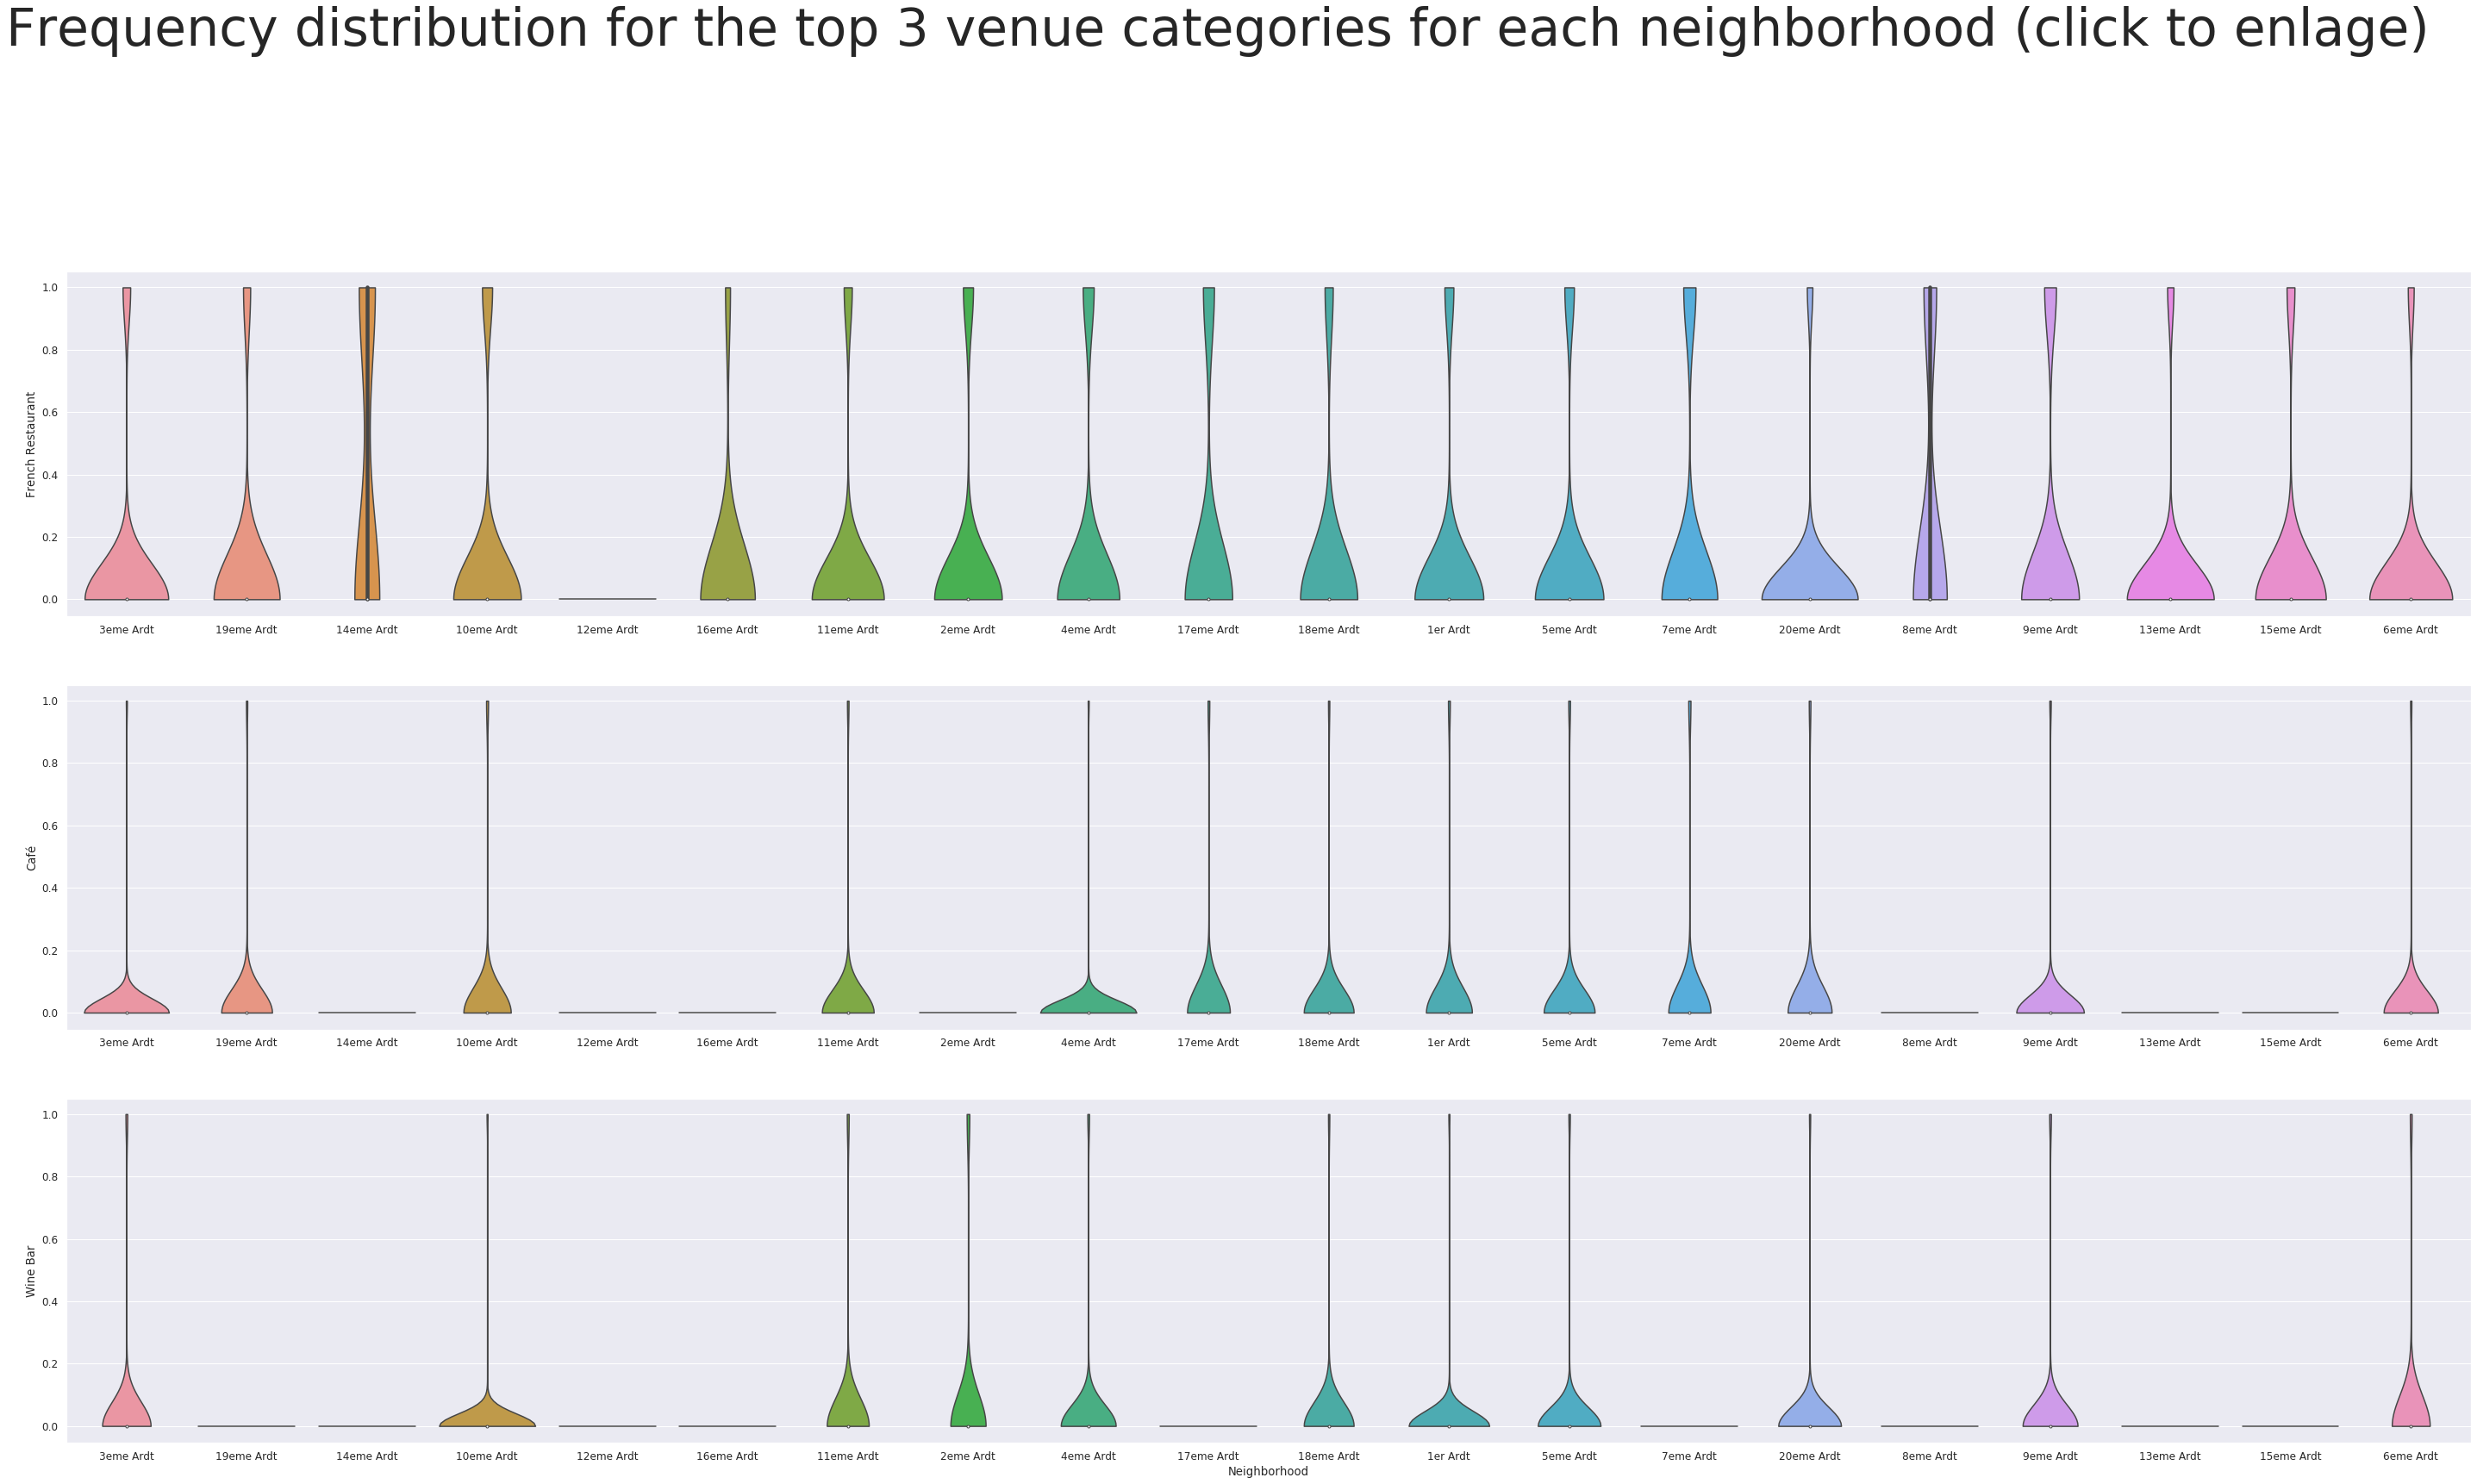

In [28]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

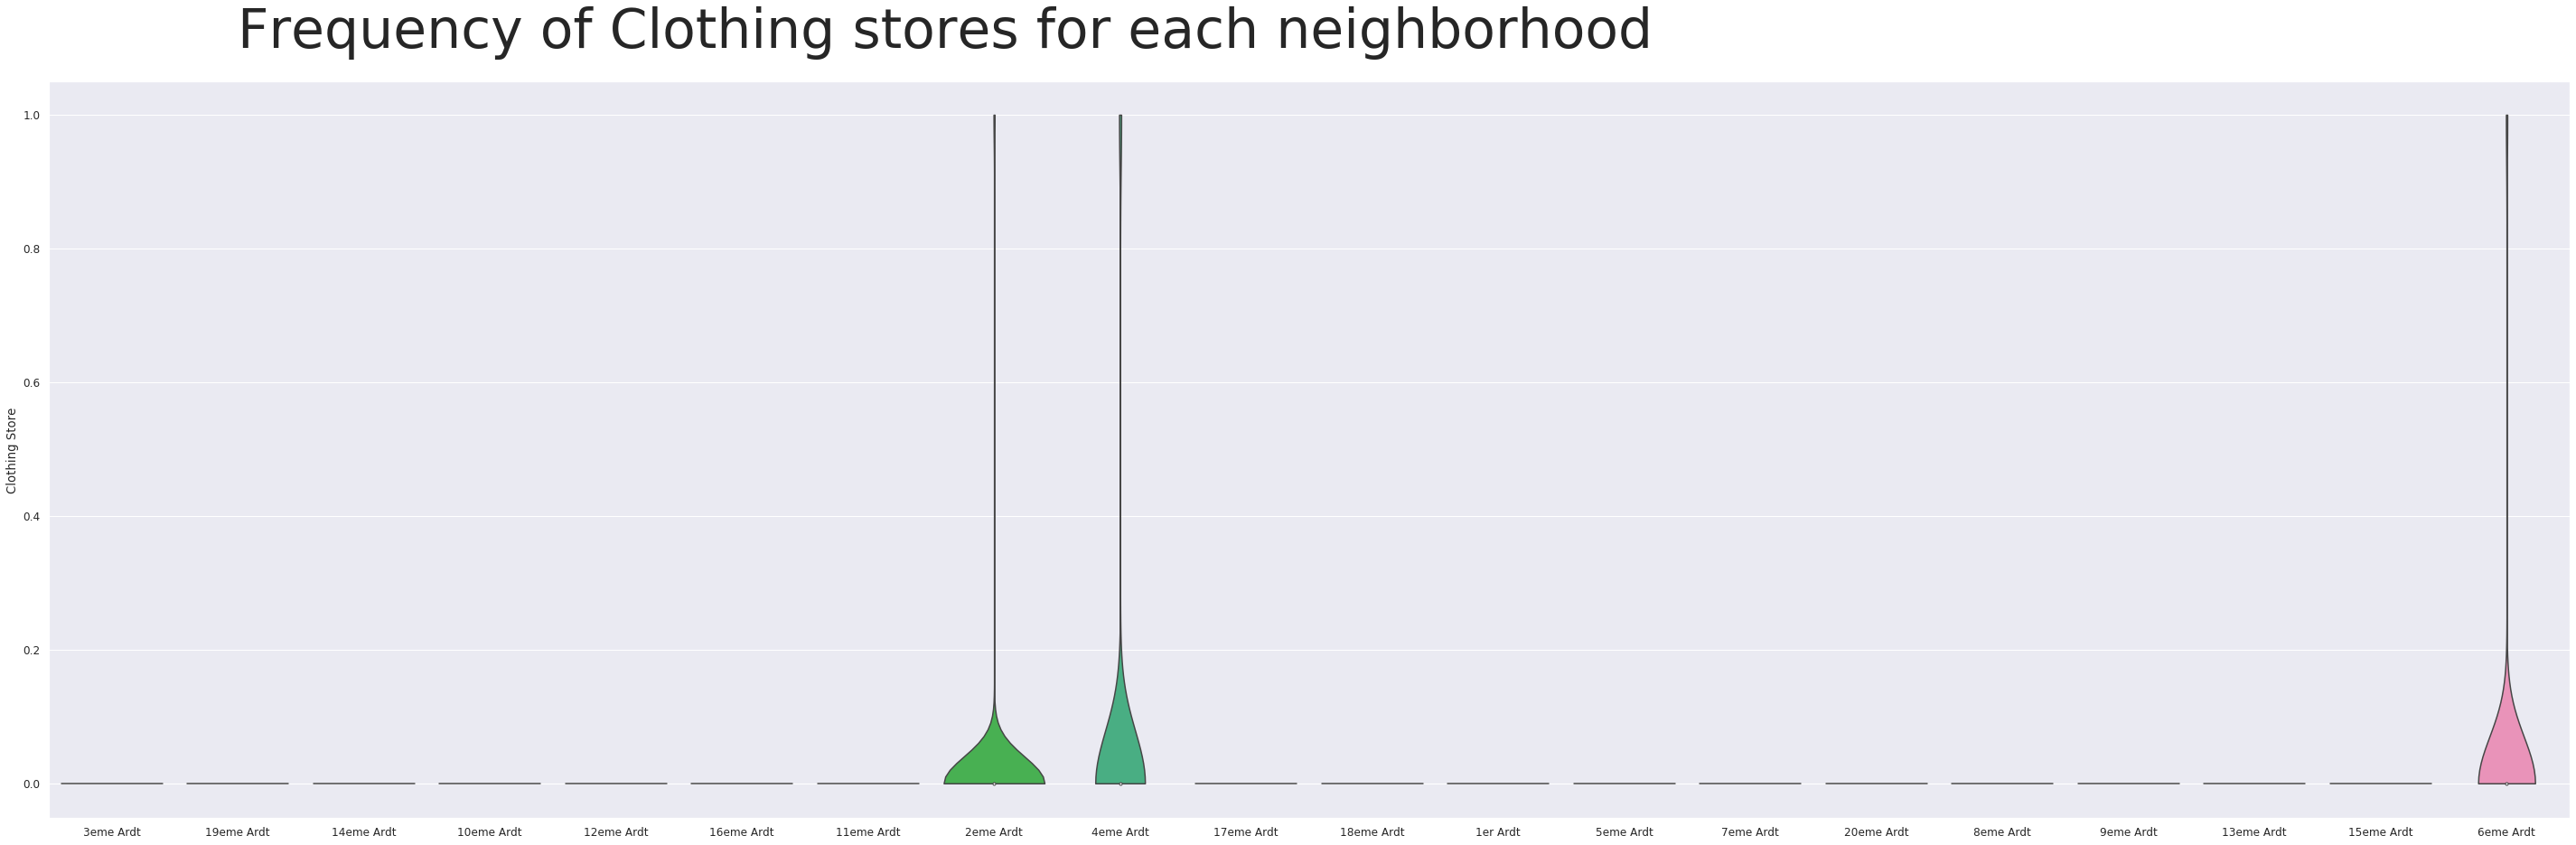

In [29]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

From the plot, we know there are 5 neighborhoods that have a significant frequency density of clothing stores.

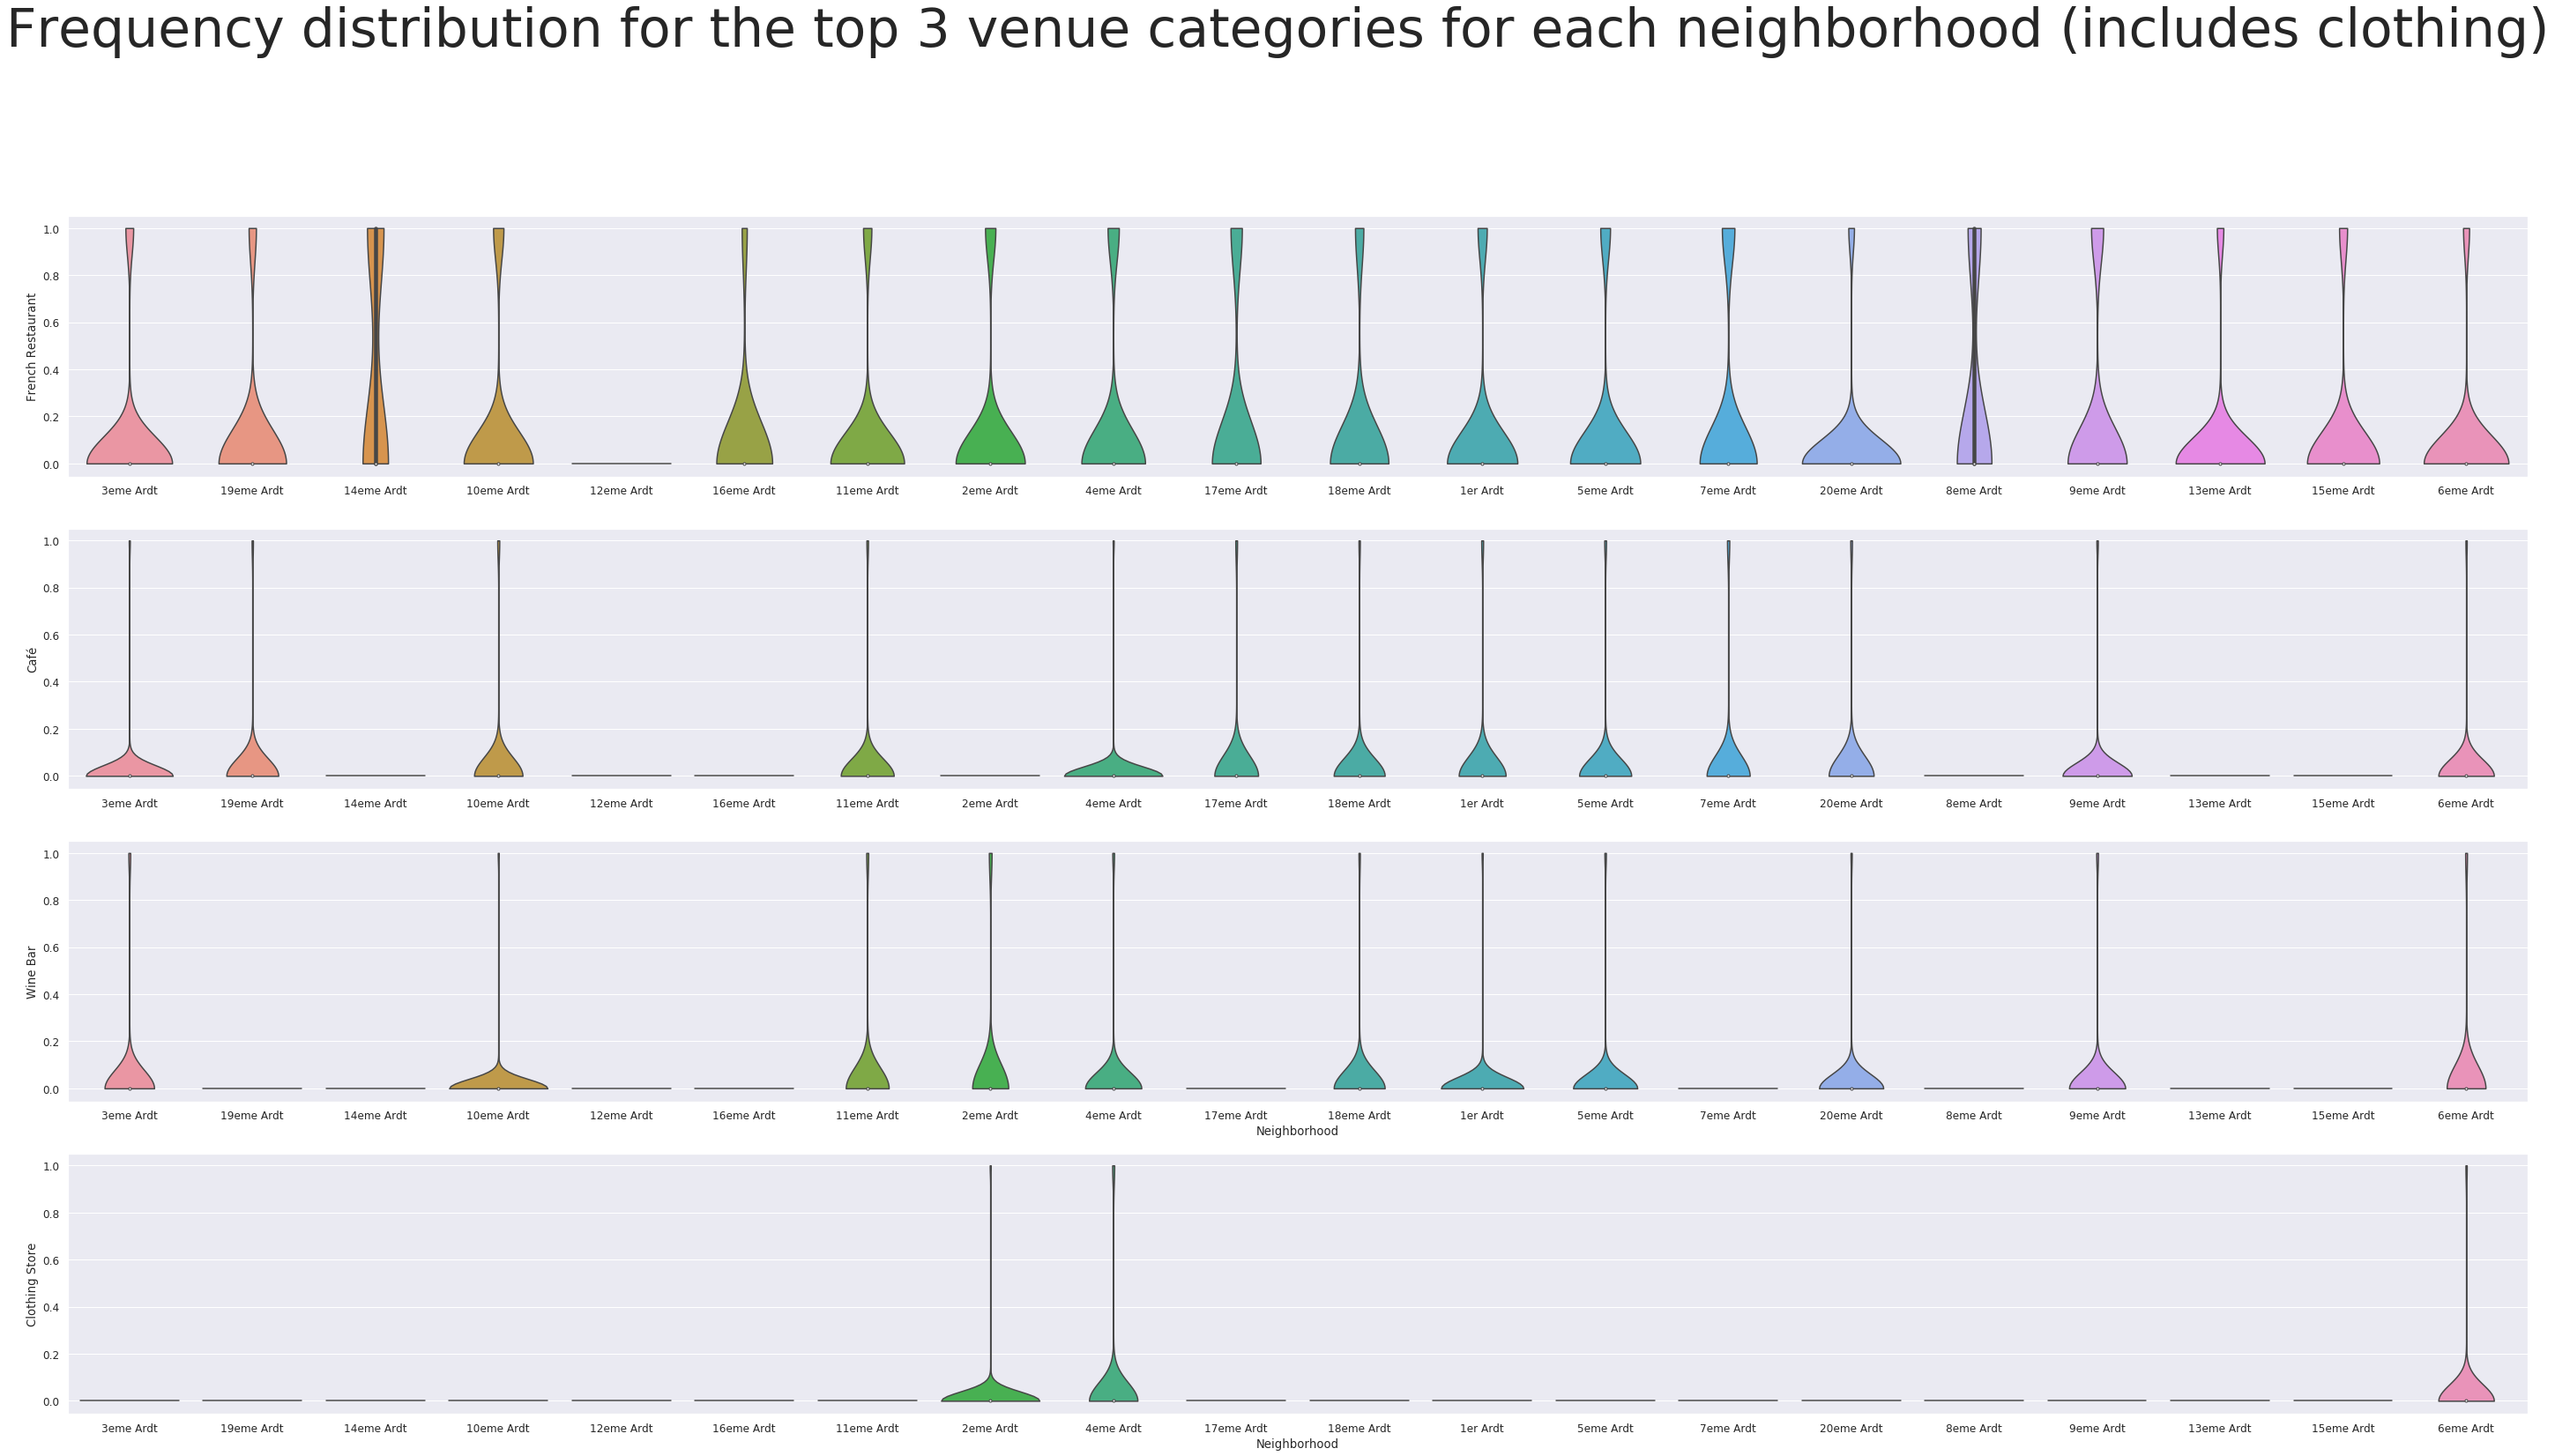

In [30]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [32]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [33]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

__The map above shows top 3 optimal neighborhoods! We can zoom and see them closer as follows.__

In [34]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Results and Discussion <a name="results"></a>

From this visualization, it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districts is very large, and researching and then visiting them all would be a daunting and time-consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's business.
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighborhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.


## Conclusion and Report Link <a name="conclusion"></a>

There are many ways this analysis could have been performed based on different methodology and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the criteria for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorithms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.
Without leveraging data to make focus decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

For the __Report__ to the stakeholders, please refer to this link:
https://github.com/miss20km/IBM-Capstonn-Project/blob/master/Capstone%20Project%20Final%20Report.pdf

Thanks for taking part in the Data Science journey!
